In [8]:
#K fold cross validation

In [53]:
import pandas as pd
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import warnings

warnings.filterwarnings("ignore")


df = pd.read_csv('processed_data.csv')

selected_columns = ['Basic description num_changes',
        'Basic description average_edit_distance',
        'Basic description edit_distance_per_character',
        'Basic username num_changes',
        'Basic username average_edit_distance',
        'Basic username edit_distance_per_character',
        'Basic full_name num_changes',
        'Basic full_name average_edit_distance',
        'Basic full_name edit_distance_per_character',
        'Activity followers_count average_diff',
        'Activity favourites_count average_diff',
        'Activity friends_count average_diff',
        'Activity listed_count average_diff',
        'Activity statuses_count average_diff',
        'Privacy Exists']


df_new = df[selected_columns]

df_majority = df_new[df_new['Privacy Exists']==0]
df_minority = df_new[df_new['Privacy Exists']==1]
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=2750,     # to match minority class
                                 random_state=123) # reproducible results
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

X = df_downsampled.iloc[:, 0:-1].values
Y = df_downsampled.iloc[:, -1:].values


scaler = StandardScaler(); X = scaler.fit_transform(X)
X_new = SelectKBest(f_classif, k=14).fit_transform(X, Y)


X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.3, random_state = 5)
kf = KFold(n_splits=10, shuffle=True, random_state=5)


In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

models = {
    'Random Forest': RandomForestClassifier(n_estimators=130, max_depth = 100, min_samples_split = 6,min_samples_leaf = 3, bootstrap = False,max_features = 'auto'),
}

    
print('K fold \n')
    
for name, model in models.items():
    print('Training', name)

    clf = model

    train_acc_scores = []
    test_acc_scores = []

    for train_index, test_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

        clf.fit(X_train_fold, y_train_fold)

        y_pred_train = clf.predict(X_train_fold)
        y_pred_val = clf.predict(X_val_fold)

        train_acc = accuracy_score(y_train_fold, y_pred_train)
        test_acc = accuracy_score(y_val_fold, y_pred_val)

        train_acc_scores.append(train_acc)
        test_acc_scores.append(test_acc)

    avg_train_acc = sum(train_acc_scores) / len(train_acc_scores)
    avg_test_acc = sum(test_acc_scores) / len(test_acc_scores)

    print('Average train accuracy:', avg_train_acc)
    print('Average test accuracy:', avg_test_acc)
    
    
for name, model in models.items():
    print('\n Training', name)

    clf = model
    clf = clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    scores_train = cross_val_score(clf, y_train, y_pred_train, cv=5)
    print('train cross val',scores_train.mean())
    scores_test = cross_val_score(clf, y_test, y_pred_test, cv=5)
    print('test cross val',scores_test.mean())

    scores_train = accuracy_score(y_train, y_pred_train)
    print('train acc',scores_train.mean())
    scores_test = accuracy_score(y_test, y_pred_test)
    print('test acc',scores_test.mean())


K fold 

Training Random Forest
Average train accuracy: 0.9076978810304942
Average test accuracy: 0.6435367662640391

 Training Random Forest
train cross val 0.9077866321082526
test cross val 0.6604336713661473
train acc 0.9077897054775668
test acc 0.6604621309370988


In [47]:
print(test_acc_scores)

[0.6538461538461539, 0.6291208791208791, 0.6785714285714286, 0.6473829201101928, 0.6308539944903582, 0.5922865013774105, 0.6198347107438017, 0.6666666666666666, 0.6391184573002755, 0.6776859504132231]


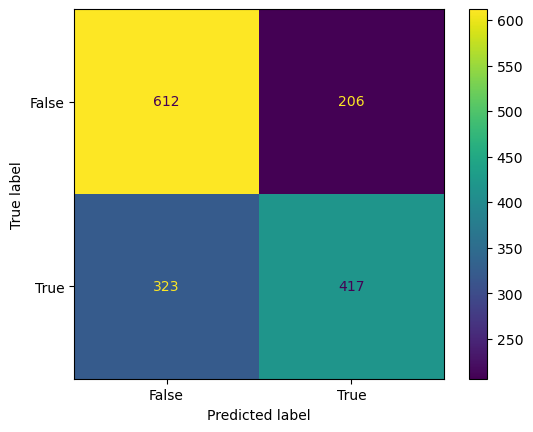

<Figure size 640x480 with 0 Axes>

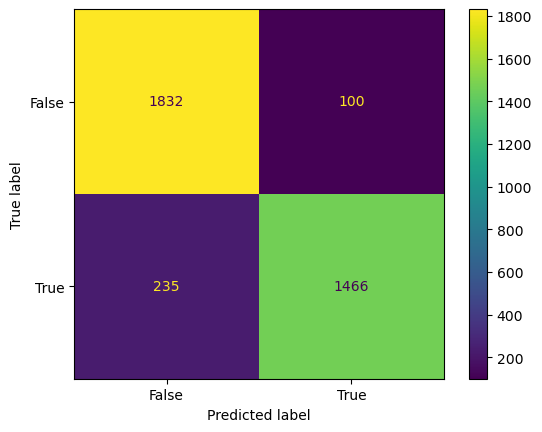

In [46]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_test, display_labels = [False, True])
cm_display.plot()
plt.show()
plt.figure()

confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_train, display_labels = [False, True])
cm_display.plot()
plt.show()

In [7]:
from sklearn.model_selection import ShuffleSplit

clf = model
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(clf, X, Y, cv=cv)

array([0.7169448 , 0.70218228, 0.70474968, 0.70410783, 0.70988447])

In [18]:
df.columns

Index(['user_id', 'Activity favourites_count average_diff',
       'Activity favourites_count cv_diff',
       'Activity favourites_count mad_diff',
       'Activity favourites_count max_diff',
       'Activity favourites_count median_diff',
       'Activity favourites_count min_diff',
       'Activity favourites_count range_diff',
       'Activity favourites_count skew_diff',
       'Activity favourites_count std_diff',
       'Activity favourites_count var_diff',
       'Activity followers_count average_diff',
       'Activity followers_count cv_diff', 'Activity followers_count mad_diff',
       'Activity followers_count max_diff',
       'Activity followers_count median_diff',
       'Activity followers_count min_diff',
       'Activity followers_count range_diff',
       'Activity followers_count skew_diff',
       'Activity followers_count std_diff',
       'Activity followers_count var_diff',
       'Activity friends_count average_diff', 'Activity friends_count cv_diff',
       '

In [43]:
df = pd.read_csv('processed_data.csv')


pattern = r'average|std|num_changes'
selected_columns = [col for col in df.columns if re.search(pattern, col)]


selected_columns = ['Basic description num_changes',
        'Basic description average_edit_distance',
        'Basic description edit_distance_per_character',
        'Basic username num_changes',
        'Basic username average_edit_distance',
        'Basic username edit_distance_per_character',
        'Basic full_name num_changes',
        'Basic full_name average_edit_distance',
        'Basic full_name edit_distance_per_character',
        'Activity followers_count average_diff',
        'Activity favourites_count average_diff',
        'Activity friends_count average_diff',
        'Activity listed_count average_diff',
        'Activity statuses_count average_diff',
        'Privacy Exists']

df_new = df[selected_columns]

df_new.shape

(155128, 15)